In [1]:
import networkx as nx
import pandas as pd
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("space_data.tsv", sep = "\t")

In [3]:
df.head()

,source,target,depth
0,space exploration,discovery and exploration of the solar system,1
1,space exploration,in-space propulsion technologies,1
2,space exploration,robotic spacecraft,1
3,space exploration,timeline of planetary exploration,1
4,space exploration,landings on other planets,1


In [4]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [5]:
def getRandomWalk(node, path_length):
    random_walk = [node]
    for _ in range(path_length - 1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))
        if len(temp) == 0:
            break
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
    return random_walk


In [6]:
getRandomWalk('space exploration', 10)

['space exploration', 'astronaut', 'cosmonautics day', 'astronauts day']

In [7]:
all_nodes = list(G.nodes())

random_walks = []

for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(getRandomWalk(n, 10))

100%|██████████| 2088/2088 [00:00<00:00, 14378.25it/s]


In [8]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [9]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

In [10]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(979832, 1008940)

In [11]:
# find top n similar nodes
model.wv.most_similar('astronaut training', topn=5)

[('micro-g environment', 0.9770119786262512),
 ('reduced-gravity aircraft', 0.946979820728302),
 ('microgravity university', 0.8798154592514038),
 ('spaceflight osteopenia', 0.8751360774040222),
 ('papilledema', 0.8746218681335449)]

In [12]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 'moon landing',
        'space food', 'food systems on space exploration missions', 'meal, ready-to-eat',
        'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
        'astronaut training', 'reduced-gravity aircraft', 'space adaptation syndrome', 'micro-g environment']

In [15]:
def plot_nodes(word_list):
    X = model.wv[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

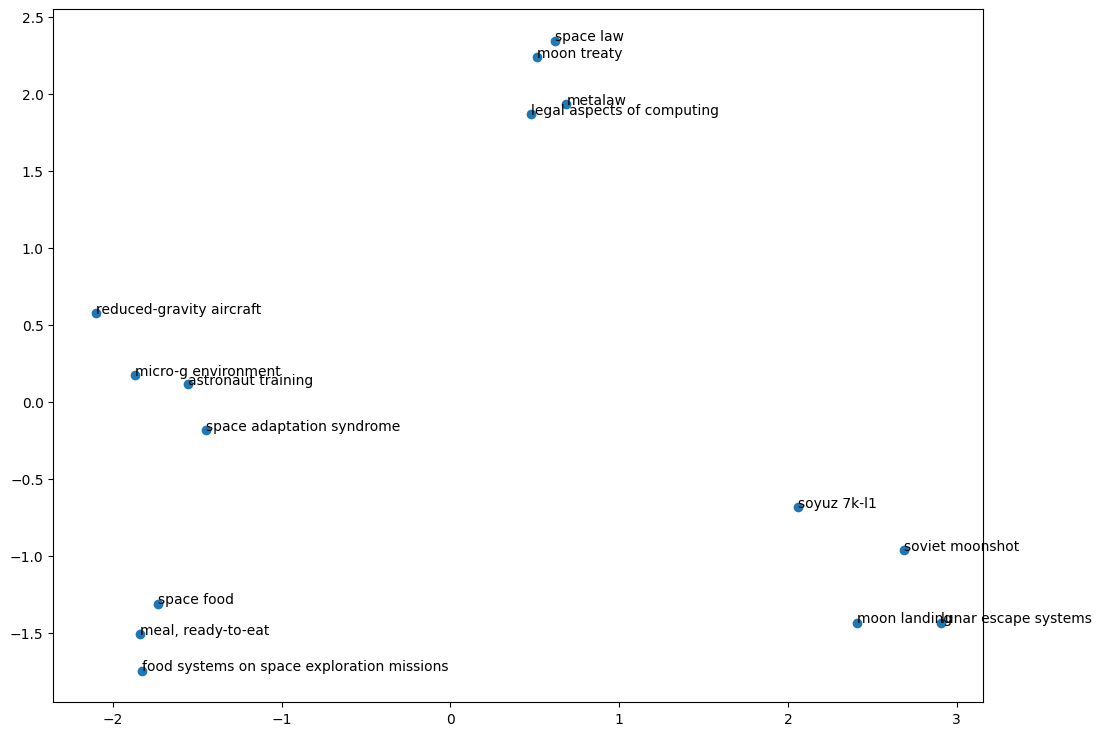

In [16]:
plot_nodes(terms)